In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from algo.sde.brownian_motion import BrownianMotion
from algo.sde.ornstein_uhlenbeck import OrnsteinUhlenbeck


np.random.seed(0)

In [3]:
ou = OrnsteinUhlenbeck(k=0.07, theta=55.0, sigma=0.9)
process = ou(num_samples=1000)

(array([46., 48., 50., 52., 54., 56., 58., 60., 62., 64.]),
 [Text(0, 46.0, '46'),
  Text(0, 48.0, '48'),
  Text(0, 50.0, '50'),
  Text(0, 52.0, '52'),
  Text(0, 54.0, '54'),
  Text(0, 56.0, '56'),
  Text(0, 58.0, '58'),
  Text(0, 60.0, '60'),
  Text(0, 62.0, '62'),
  Text(0, 64.0, '64')])

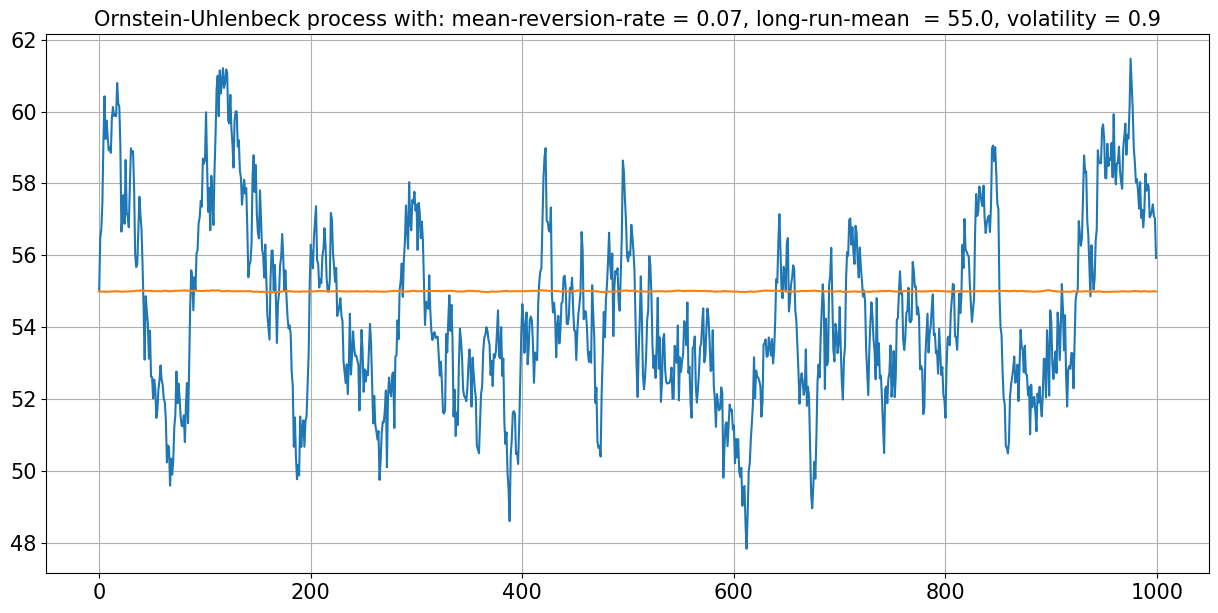

In [7]:
fig = plt.figure(figsize=(15, 7))

title = f"Ornstein-Uhlenbeck process with: mean-reversion-rate = {ou.k}, long-run-mean  = {ou.theta}, volatility = {ou.sigma}"
plt.plot(process)
plt.plot(process2)
plt.grid()
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [ ]:
# From 3.

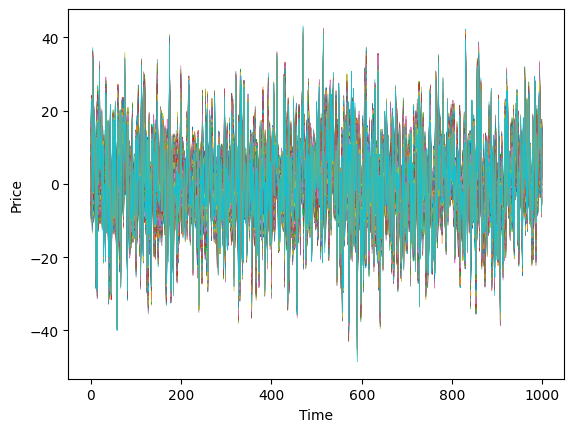

In [ ]:
num_timesteps = 200
t = np.linspace(0, num_timesteps-1, num_timesteps)
dt = np.mean(np.diff(t))

num_sims = 1000

y0 = process[-1]


# Careful, this alpha is not the alpha above!
# alpha = ou.gamma
alpha = -(ou.beta**2)/(2*ou.alpha)  # ou.alpha is k in 3.


def mc(num_timesteps, k, alpha, t):
    paths = [y0]
    bm_rets = ou.dW(num_timesteps)
    
    for i in range(0, num_timesteps-1):
        drift = k*(alpha-paths[i])*dt
        rand = bm_rets[i]

        path = paths[i] + drift + rand
        paths.append(path)
    
    return paths


# paths = np.asarray([mc(num_timesteps, ou.alpha, alpha, t) for _ in range(num_sims)])
paths = np.asarray([ou.W(num_timesteps) for _ in range(num_sims)])

int_path = np.exp(paths.T)

plt.plot(paths, lw=0.5)
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()